In [1]:
import numpy as np
import pandas as pd
import timeit

# Please, to run the experiment donwload the following dataset and put it in the /Dataset folder:
# 	- household_power_consumption.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
#       (extract the .txt file)

filename = "Datasets/household_power_consumption.txt"
df = pd.read_csv(filename, sep=';', header=0, usecols=[2,3,4])
df = df.dropna()

print(list(df.columns.values))

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Global_active_power', 'Global_reactive_power', 'Voltage']


In [2]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

df.head()

(2049280, 3)
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
dtype: object


,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29
3,5.388,0.502,233.74
4,3.666,0.528,235.68


In [3]:
x = df[['Global_active_power','Global_reactive_power']]
x = x.to_numpy()
y = df['Voltage']
y = y.to_numpy()
n = x.shape[1]

In [4]:
import recombination as rb

print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(2049280, 2)
(2049280, 9)
(2049280, 6)


In [5]:
mean_t = 0.

time_rand = []
iterations_rand = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                    xy_sq[:,n+1:]-np.mean(xy_sq[:,n+1:],0), 400)
    time_rand.append((timeit.default_timer()-tic)*1000)
    iterations_rand.append(iterations)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHCEK FINISHED
    
    mean_t += time_rand[-1]
    print("sample = ", i)
    print("time = ", time_rand[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_rand)
max_t = max(time_rand)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  0
time =  746.1287619999979 ms
mean time =  746.1287619999979 ms
sample =  1
time =  773.676383999998 ms
mean time =  759.902572999998 ms
sample =  2
time =  694.4733419999949 ms
mean time =  738.0928293333303 ms
sample =  3
time =  134.05961699999125 ms
mean time =  587.0845262499955 ms
sample =  4
time =  137.77940599999283 ms
mean time =  497.223502199995 ms
sample =  5
time =  341.6095119999909 ms
mean time =  471.28783716666095 ms
sample =  6
time =  133.90325999999675 ms
mean time =  423.0900404285661 ms
sample =  7
time =  750.6195200000008 ms
mean time =  464.0312253749954 ms
sample =  8
time =  793.4024569999991 ms
mean time =  500.6280288888847 ms
sample =  9
time =  354.07908700000235 ms
mean time =  485.9731346999964 ms
sample =  10
time =  132.27211499999214 ms
mean time =  453.8184965454506 ms
sample =  11
time =  372.8956190000048 ms
mean time =  447.07492341666347 ms
sample =  12
time =  138.47922100001142 ms
mean time =  423.3367924615364 ms
sample =  13
time

In [6]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  0
time =  437.8868260000104 ms
mean time =  437.8868260000104 ms
sample =  1
time =  477.48935999999276 ms
mean time =  457.6880930000016 ms
sample =  2
time =  493.08960799999113 ms
mean time =  469.4885979999981 ms
sample =  3
time =  486.7849080000042 ms
mean time =  473.8126754999996 ms
sample =  4
time =  480.2961690000416 ms
mean time =  475.109374200008 ms
sample =  5
time =  478.07952400000886 ms
mean time =  475.6043991666748 ms
sample =  6
time =  483.0915499999833 ms
mean time =  476.6739921428617 ms
sample =  7
time =  482.1654840000065 ms
mean time =  477.36042862500483 ms
sample =  8
time =  478.1900600000313 ms
mean time =  477.45260988889663 ms
sample =  9
time =  479.6026930000039 ms
mean time =  477.6676182000074 ms
sample =  10
time =  483.70618000001286 ms
mean time =  478.21657836364426 ms
sample =  11
time =  485.38994700004423 ms
mean time =  478.81435908334424 ms
sample =  12
time =  481.7409879999559 ms
mean time =  479.0394843846221 ms
sample =  13
t

In [7]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  561.3108659999853 ms
mean time =  561.3108659999853 ms
sample =  1
time =  514.8586700000806 ms
mean time =  538.0847680000329 ms
sample =  2
time =  528.8260370000444 ms
mean time =  534.99852433337 ms
sample =  3
time =  529.1655730000002 ms
mean time =  533.5402865000276 ms
sample =  4
time =  527.7468340000269 ms
mean time =  532.3815960000275 ms
sample =  5
time =  521.2478040000406 ms
mean time =  530.5259640000296 ms
sample =  6
time =  517.7952420000338 ms
mean time =  528.7072894286017 ms
sample =  7
time =  520.5650379999724 ms
mean time =  527.689508000023 ms
sample =  8
time =  526.8809870000268 ms
mean time =  527.5996723333568 ms
sample =  9
time =  523.4435639999901 ms
mean time =  527.1840615000201 ms
sample =  10
time =  526.4020009999513 ms
mean time =  527.1129650909229 ms
sample =  11
time =  536.7772470000318 ms
mean time =  527.918321916682 ms
sample =  12
time =  536.4350730000069 ms
mean time =  528.5734566153993 ms
sample =  13
time =  523.1

In [8]:
mean_t = 0.
sample = 1000

time_log = np.zeros(sample)
min_t = 0.
max_t = 0.

COV = np.matmul(x[:,:].T,x[:,:])/N
    
for i in range(sample):
    x_cp = np.copy(xy_sq[:,n+1:])

    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
    time_log[i] = (timeit.default_timer()-tic)*1000

    ################ CHECK
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED

    mean_t += time_log[i]
    print("sample = ", i)
    print("time = ", time_log[i], "ms")
    print("mean time = ", mean_t/(i+1), "ms")
    
mean_t = np.mean(time_log)
min_t = np.min(time_log)
max_t = np.max(time_log)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  0
time =  214.73297600005026 ms
mean time =  214.73297600005026 ms
sample =  1
time =  181.95488700007445 ms
mean time =  198.34393150006235 ms
sample =  2
time =  185.72672899995268 ms
mean time =  194.13819733335913 ms
sample =  3
time =  167.27975700007391 ms
mean time =  187.42358725003783 ms
sample =  4
time =  195.74701399994865 ms
mean time =  189.08827260002 ms
sample =  5
time =  183.57578900008775 ms
mean time =  188.16952533336462 ms
sample =  6
time =  193.96830199991655 ms
mean time =  188.99792200001488 ms
sample =  7
time =  179.6416729999919 ms
mean time =  187.82839087501202 ms
sample =  8
time =  185.9294119999504 ms
mean time =  187.6173932222274 ms
sample =  9
time =  183.1711739999946 ms
mean time =  187.17277130000411 ms
sample =  10
time =  169.99211299992112 ms
mean time =  185.61089327272384 ms
sample =  11
time =  172.8249320000259 ms
mean time =  184.54539649999901 ms
sample =  12
time =  188.13731200009443 ms
mean time =  184.82169769231405 ms
samp

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


sample =  21
time =  186.08237400007965 ms
mean time =  183.75903159092002 ms
sample =  22
time =  185.36925200010046 ms
mean time =  183.82904117392786 ms
sample =  23
time =  171.9669999999951 ms
mean time =  183.33478945834733 ms
sample =  24
time =  186.42941300004168 ms
mean time =  183.4585744000151 ms
sample =  25
time =  172.52532299994527 ms
mean time =  183.03806473078163 ms
sample =  26
time =  182.52086300003612 ms
mean time =  183.0189091111244 ms
sample =  27
time =  187.6306819999627 ms
mean time =  183.18361528572578 ms
sample =  28
time =  175.07417399997394 ms
mean time =  182.90397937932053 ms
sample =  29
time =  185.3006369999548 ms
mean time =  182.983867966675 ms
sample =  30
time =  194.68517400002838 ms
mean time =  183.36132945162188 ms
sample =  31
time =  173.0785830000059 ms
mean time =  183.0399936250089 ms
sample =  32
time =  179.58978499996192 ms
mean time =  182.9354418484923 ms
sample =  33
time =  181.10609200005 ms
mean time =  182.88163744118518 ms

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:1010: RuntimeWarning: divide by zero encountered in true_divide
  A_new = A_old - prod_2/c
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:352: RuntimeWarning: invalid value encountered in matmul
  test_inv = np.matmul(A,np.transpose(X[idx,:]))


sample =  324
time =  170.24657199999638 ms
mean time =  169.01380711692659 ms
sample =  325
time =  174.32288300005894 ms
mean time =  169.03009262577055 ms
sample =  326
time =  175.105206000012 ms
mean time =  169.04867095413215 ms
sample =  327
time =  165.30422799996813 ms
mean time =  169.0372549695158 ms
sample =  328
time =  174.3014180000273 ms
mean time =  169.05325546504926 ms
sample =  329
time =  167.2220230000221 ms
mean time =  169.04770627576133 ms
sample =  330
time =  170.40949399995498 ms
mean time =  169.05182043807005 ms
sample =  331
time =  165.86914899994554 ms
mean time =  169.04223407831668 ms
sample =  332
time =  174.83474799996657 ms
mean time =  169.05962901501832 ms
sample =  333
time =  167.99640600004295 ms
mean time =  169.05644571257827 ms
sample =  334
time =  172.79698400000143 ms
mean time =  169.06761149851087 ms
sample =  335
time =  170.236186000011 ms
mean time =  169.07108939881294 ms
sample =  336
time =  175.564688999998 ms
mean time =  169.

In [9]:
time_rand = np.array(time_rand)
iterations_rand = np.array(iterations_rand)
time_FC = np.array(time_FC)
time_log = np.array(time_log)
time_MT = np.array(time_MT)

np.set_printoptions(precision=1)

print("Probability to be faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC))/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC)/4)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand))

print("The expected time of the log-random is ", np.mean(time_log), "ms")

print("Standard deviation of the log-random is  = ", np.std(time_log))

np.set_printoptions(precision=1)
print('''Some statistics for the randomized algorithm are: 
      average running time = ''', np.round(np.mean(time_rand),1),  
      "ms, min = " , np.round(np.min(time_rand),1), "ms, max = ", np.round(np.max(time_rand),1),
      "ms, std ", np.round(np.std(time_rand),1), 
      "ms. Using the log-random strategy they are: average running time = ", np.round(np.mean(time_log),1),
      "ms, min = ", np.round(np.min(time_log),1), "ms, max = ", np.round(np.max(time_log),1),
      ", std = ", np.round(np.std(time_log),1), "ms.",
      " Average runnig times of determinsitic: TL = ", np.round(np.mean(time_MT),1),
      "ms, MJF = ", np.round(np.mean(time_FC),1),"ms.")

Probability to be faster =  80.5 %
Probability to be 4x faster =  46.7 %
Standard deviation =  430.0751051231694
The expected time of the log-random is  173.8238948650012 ms
Standard deviation of the log-random is  =  10.090132099583416
Some statistics for the randomized algorithm are: 
      average running time =  381.8 ms, min =  123.6 ms, max =  4320.7 ms, std  430.1 ms. Using the log-random strategy they are: average running time =  173.8 ms, min =  141.6 ms, max =  214.7 , std =  10.1 ms.  Average runnig times of determinsitic: TL =  477.8 ms, MJF =  552.2 ms.


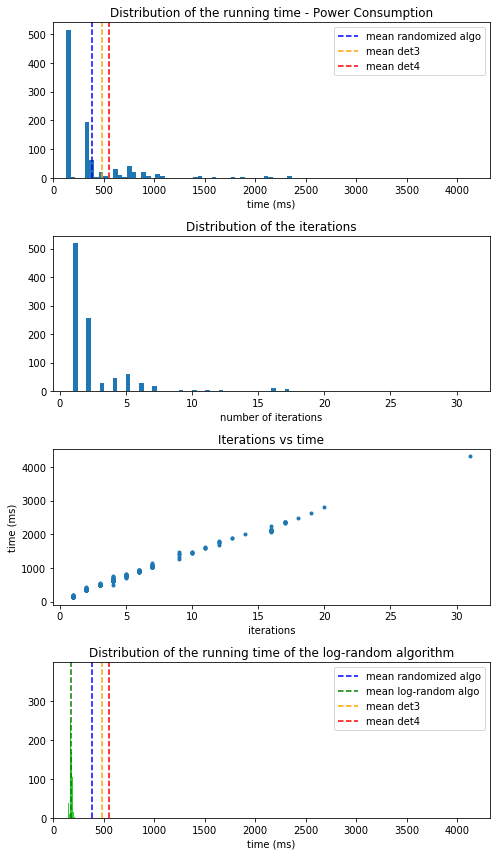

In [16]:
# import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,1,figsize=(7,12))

################################################
plt.subplot(4, 1, 1)

plt.hist(time_rand, bins=int(90))
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")

plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time - Power Consumption')
plt.xlabel('time (ms)')

################################################
plt.subplot(4, 1, 2)

plt.hist(iterations_rand, bins=int(90))
plt.title('Distribution of the iterations')
plt.xlabel('number of iterations')
plt.xscale('linear')

################################################
plt.subplot(4, 1, 3)

plt.plot(iterations_rand,time_rand, '.')
plt.xlabel('iterations')
plt.ylabel('time (ms)')
plt.title('Iterations vs time')

################################################
plt.subplot(4, 1, 4)

plt.hist(time_log, bins=int(10),color='limegreen')
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), 0, max(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time of the log-random algorithm')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_elec.pdf')#, bbox_inches='tight')
plt.show()



In [11]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  0
time =  163.21289300003627 ms
mean time =  163.21289300003627 ms
sample =  1
time =  168.3296919999293 ms
mean time =  165.7712924999828 ms
sample =  2
time =  175.95838699992328 ms
mean time =  169.16699066662963 ms
sample =  3
time =  186.47043299995403 ms
mean time =  173.49285124996072 ms
sample =  4
time =  176.70455300003596 ms
mean time =  174.13519159997577 ms
sample =  5
time =  179.2940190000536 ms
mean time =  174.9949961666554 ms
sample =  6
time =  179.45245499993234 ms
mean time =  175.63177599998068 ms
sample =  7
time =  176.78688000000875 ms
mean time =  175.7761639999842 ms
sample =  8
time =  171.58497899993108 ms
mean time =  175.31047677775607 ms
sample =  9
time =  171.50336499992136 ms
mean time =  174.9297655999726 ms
sample =  10
time =  173.87271000006876 ms
mean time =  174.83366963634498 ms
sample =  11
time =  167.68237399992358 ms
mean time =  174.23772833330986 ms
sample =  12
time =  168.81033200002094 ms
mean time =  173.82023630767225 ms
sa

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  32
time =  171.58089099996232 ms
mean time =  176.03122015150967 ms
sample =  33
time =  175.9965059999331 ms
mean time =  176.03019914705155 ms
Recombination procedure iteration =  200
Recombination procedure iteration =  400
ERROR: NO convergence
Using determiinistic Algorithm
sample =  34
time =  262.915616999976 ms
mean time =  178.5126396571351 ms
sample =  35
time =  162.83438800007843 ms
mean time =  178.0771326666613 ms
sample =  36
time =  171.65454899998167 ms
mean time =  177.90354932431862 ms
sample =  37
time =  173.73004299997774 ms
mean time =  177.79372021052018 ms
sample =  38
time =  173.889837000047 ms
mean time =  177.69362064102086 ms
sample =  39
time =  175.14302500001122 ms
mean time =  177.6298557499956 ms
sample =  40
time =  187.45447900005274 ms
mean time =  177.86948070731407 ms
sample =  41
time =  184.09383999994589 ms
mean time =  178.01767973809103 ms
sample =  42
time =  185.89989700001297 ms
mean time =  178.20098711627526 ms
sample =  43
ti

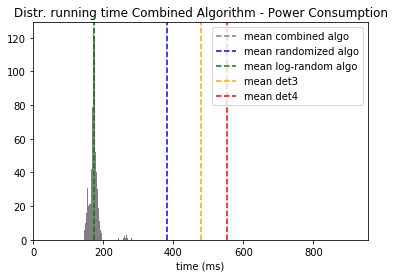

In [14]:
maximum = max(np.mean(time_rand),np.mean(time_log),np.mean(time_MT),np.mean(time_rand),np.mean(time_combined))*2

plt.hist(time_combined,bins=int(70),color='grey')
plt.axvline(np.mean(time_combined), linestyle='dashed', color="grey", label="mean combined algo")
plt.axvline(np.mean(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, maximum))

plt.legend()
plt.title('Distr. running time Combined Algorithm - Power Consumption')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_elec_combined.pdf')#, bbox_inches='tight')
plt.show()